In [1]:
#letus import the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.layers import Conv1D,MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam

In [2]:
data=pd.read_csv("creditcard.csv")
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
data.isnull().sum()#to check if any null valus present

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
data.info


<bound method DataFrame.info of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  

In [5]:
data['Class'].value_counts() #to chek how many 0 and 1

0    284315
1       492
Name: Class, dtype: int64

In [6]:
#this is a imbalanced data. To balance data we are doing this 
non_fraud=data[data['Class']==0]
fraud=data[data['Class']==1]

In [7]:
#shape of fraud and non_fraud data
non_fraud.shape,fraud.shape
#this shows 492 as fraud and 284315 as non fraud transactions

((284315, 31), (492, 31))

In [8]:
#select 492 rows from non fraud data as ramdom samples to make the shape of fraud and non fraud transactions
non_fraud=non_fraud.sample(fraud.shape[0])# this means to select 492 samples
non_fraud.shape

(492, 31)

In [9]:
#merge the two dataframes together
data=fraud.append(non_fraud,ignore_index=True)
data.shape

(984, 31)

In [10]:
data['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [11]:
#split into X and y. Features
X=data.drop('Class', axis=1) #take all the columns except class
y=data['Class']# take columns with class 


In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)#prepared for training and testing data set

In [13]:
X_train.shape,X_test.shape #to check the size of training datasets

((787, 30), (197, 30))

In [14]:
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
845,35495.0,0.792287,-1.663979,1.023317,-0.044865,-2.040455,-0.430032,-0.746397,-0.043087,0.076695,...,0.592921,0.188901,0.102832,-0.193289,0.755700,0.240317,-0.293383,0.003237,0.075965,281.98
898,83139.0,-1.183915,1.375058,0.810317,1.157650,-0.148057,0.017864,0.208546,0.525496,-0.420944,...,0.153425,-0.017242,0.157034,-0.230970,0.029795,0.045199,-0.256606,0.284740,0.165131,22.69
45,18399.0,-14.474437,6.503185,-17.712632,11.270352,-4.150142,-3.372098,-16.535807,-1.443947,-6.815273,...,1.101250,-2.475962,0.342391,-3.564508,-0.818140,0.153408,0.755079,2.706566,-0.992916,1.00
536,156780.0,2.132762,-0.950364,-1.037622,-1.128668,-0.459604,-0.030797,-0.809744,0.085458,-0.327510,...,0.001604,-0.246827,-0.875429,0.444922,0.145006,-0.530275,-0.695656,-0.022238,-0.050690,29.95
739,62205.0,1.172120,0.246047,0.417481,1.386322,-0.110824,-0.172689,0.088093,-0.034929,0.235977,...,-0.174285,-0.099832,-0.024527,-0.063114,0.104685,0.676933,-0.313644,0.042959,0.016188,4.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,59840.0,-3.215382,-0.364223,-1.261883,3.794949,0.711206,-1.316476,-5.165141,0.625278,-1.582301,...,0.019626,0.401341,0.152191,-0.934675,-0.256148,-0.469403,-0.282496,0.866077,-0.433466,5.91
711,122387.0,1.907380,-1.191313,-1.450381,-0.876492,-0.448124,-0.422355,-0.294895,-0.139937,-0.625895,...,0.247225,0.102051,-0.006520,0.144999,0.714608,-0.152649,-0.392041,-0.062161,-0.040773,145.00
31,12095.0,-4.727713,3.044469,-5.598354,5.928191,-2.190770,-1.529323,-4.487422,0.916392,-1.307010,...,-0.207759,0.650988,0.254983,0.628843,-0.238128,-0.671332,-0.033590,-1.331777,0.705698,30.39
882,115824.0,-1.242833,1.090870,-0.998221,-2.409451,-1.015295,0.714883,-0.939202,-5.844627,-0.881658,...,-1.573008,5.260348,-2.080857,-0.449791,-0.527951,0.943702,-0.254544,0.551731,0.143633,250.00


In [15]:
#the scale of X_train data is very differet.
#we do the standarise of the data to reduce chance of overfitting
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [16]:
#the result of training set will be numpy array. So chage y to numpy
y_train=pd.DataFrame(y_train).to_numpy()
y_test=pd.DataFrame(y_test).to_numpy()
print("hello")
#CNN works on 3D. So we need to reshape the vlaues


hello


In [17]:
X_train.shape

(787, 30)

In [18]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)


In [19]:
X_train.shape,X_test.shape #the new shape is 3D


((787, 30, 1), (197, 30, 1))

In [20]:
#building CNN
input_shape=X_train[0].shape
input_shape

(30, 1)

In [21]:
epochs=100
model=Sequential()

model.add(Conv1D(32,2, activation='relu',input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64,2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))



In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 29, 32)            96        
_________________________________________________________________
batch_normalization (BatchNo (None, 29, 32)            128       
_________________________________________________________________
dropout (Dropout)            (None, 29, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1792)              0

In [23]:
model.compile(optimizer=Adam(lr=0.0001),loss='binary_crossentropy', metrics=['accuracy'])


In [24]:
history=model.fit(X_train,y_train,epochs=epochs, validation_data=(X_test,y_test),verbose=1)

Train on 787 samples, validate on 197 samples
Epoch 1/100
787/787 [==============================] - 7s 9ms/sample - loss: 0.8786 - accuracy: 0.6213 - val_loss: 0.6347 - val_accuracy: 0.7157
Epoch 2/100
787/787 [==============================] - 1s 704us/sample - loss: 0.4204 - accuracy: 0.8247 - val_loss: 0.6014 - val_accuracy: 0.7005
Epoch 3/100
787/787 [==============================] - 1s 668us/sample - loss: 0.3883 - accuracy: 0.8564 - val_loss: 0.5803 - val_accuracy: 0.6802
Epoch 4/100
787/787 [==============================] - 1s 737us/sample - loss: 0.3205 - accuracy: 0.8831 - val_loss: 0.5551 - val_accuracy: 0.7005
Epoch 5/100
787/787 [==============================] - 1s 649us/sample - loss: 0.3028 - accuracy: 0.8856 - val_loss: 0.5240 - val_accuracy: 0.7360
Epoch 6/100
787/787 [==============================] - 1s 662us/sample - loss: 0.2900 - accuracy: 0.8907 - val_loss: 0.4886 - val_accuracy: 0.7716
Epoch 7/100
787/787 [==============================] - 0s 621us/sample - l

787/787 [==============================] - 0s 568us/sample - loss: 0.1498 - accuracy: 0.9441 - val_loss: 0.1881 - val_accuracy: 0.9289
Epoch 57/100
787/787 [==============================] - 0s 602us/sample - loss: 0.1257 - accuracy: 0.9568 - val_loss: 0.1910 - val_accuracy: 0.9239
Epoch 58/100
787/787 [==============================] - 0s 585us/sample - loss: 0.1413 - accuracy: 0.9530 - val_loss: 0.1900 - val_accuracy: 0.9289
Epoch 59/100
787/787 [==============================] - 0s 611us/sample - loss: 0.1480 - accuracy: 0.9441 - val_loss: 0.1892 - val_accuracy: 0.9239
Epoch 60/100
787/787 [==============================] - 0s 608us/sample - loss: 0.1303 - accuracy: 0.9466 - val_loss: 0.1886 - val_accuracy: 0.9289
Epoch 61/100
787/787 [==============================] - 0s 589us/sample - loss: 0.1492 - accuracy: 0.9403 - val_loss: 0.1862 - val_accuracy: 0.9289
Epoch 62/100
787/787 [==============================] - 1s 683us/sample - loss: 0.1350 - accuracy: 0.9466 - val_loss: 0.1884 

In [25]:
history.history


{'loss': [0.8786296084845081,
  0.420395914678198,
  0.38833890247526737,
  0.32054654286353074,
  0.3027649151476093,
  0.2899831840922296,
  0.275300108189807,
  0.2720987193163347,
  0.25772857012788103,
  0.2301404320432543,
  0.2411020452670251,
  0.2178023040976276,
  0.19915050716912125,
  0.2043201427296126,
  0.20806293653411817,
  0.18523135395031873,
  0.1891901065113811,
  0.22509437640880386,
  0.1755052095295665,
  0.1916254352508385,
  0.18995229367834185,
  0.2011785737441183,
  0.18527307837557763,
  0.1835215295436573,
  0.18143681387548374,
  0.17762341453508015,
  0.1692971266578916,
  0.17940427610955972,
  0.16403259553744196,
  0.16459205989007575,
  0.16004715751965437,
  0.16794405277378222,
  0.17095914448042232,
  0.1538921601246697,
  0.13696569309414872,
  0.17577722852308839,
  0.14413638303134463,
  0.14502576440383397,
  0.16325381786350676,
  0.14212769872048606,
  0.15944348463109367,
  0.15395516221999667,
  0.15742528554066315,
  0.13289197530535912,

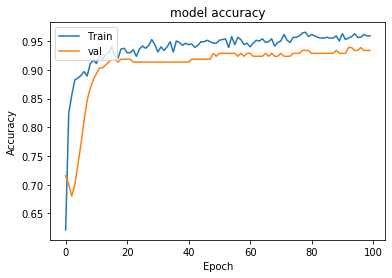

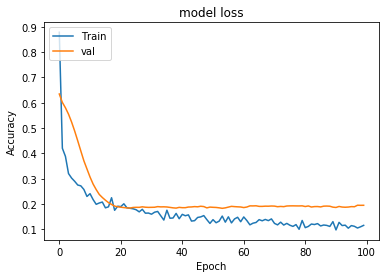

In [26]:
#plot of accuracy and other mertics
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'val'], loc='upper left')
plt.show()

#for validation loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'val'], loc='upper left')
plt.show()

In [27]:

from sklearn.metrics import roc_curve, auc
# Plot an ROC. pred - the predictions, y - the expected output.
def plot_roc(pred,y):
    fpr, tpr, _ = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

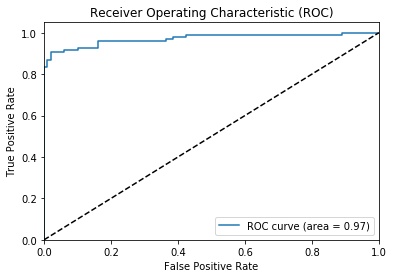

In [29]:
y_pred = model.predict(X_test)
plot_roc(pred,y_test.round())

Using TensorFlow backend.


In [31]:
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, y_test, verbose=0)

ValueError: not enough values to unpack (expected 5, got 2)